### Notebook: using jsonstat.py to explore ISTAT data (unemployment)
This Jupyter notebook shows how to use [jsonstat.py](http://github.com/26fe/jsonstat.py) python library to explore Istat data.
[Istat](http://www.istat.it/en/about-istat) is the Italian National Institute of Statistics. It publishes a rest api for browsing italian statistics. This api can return results in [jsonstat format](https://json-stat.org/). 

In [1]:
from __future__ import print_function
import os
import pandas as pd
from IPython.core.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

import istat

#### Using istat api
Next step is to set a cache dir where to store json files downloaded from Istat. Storing file on disk speeds up development, and assures consistent results over time. Eventually, you can delete donwloaded files to get a fresh copy.

In [2]:
cache_dir = os.path.abspath(os.path.join("..", "tmp", "istat_cached")) # you could choice /tmp
istat.cache_dir(cache_dir)
print("cache_dir is '{}'".format(istat.cache_dir()))

cache_dir is '/Users/26fe_nas/gioprj.on_mac/prj.python/jsonstat.py/tmp/istat_cached'


List all istat areas

In [3]:
istat.areas()

id,desc
3,2011 Population and housing census
4,Enterprises
7,Environment and Energy
8,Population and Households
9,Households Economic Conditions and Disparities
10,Health statistics
11,Social Security and Welfare
12,Education and training
13,"Communication, culture and leisure"
14,Justice and Security


List all datasets contained into area `LAB` (Labour)

In [4]:
istat_area_lab = istat.area('LAB')
istat_area_lab

LAB:Labour

List all dimension for dataset `DCCV_TAXDISOCCU` (Unemployment rate)

In [5]:
istat_dataset_taxdisoccu = istat_area_lab.dataset('DCCV_TAXDISOCCU')
istat_dataset_taxdisoccu

nr,name,nr. values,values (first 3 values)
0,Territory,136,"1:'Italy', 3:'Nord', 4:'Nord-ovest' ..."
1,Data type,1,6:'unemployment rate'
2,Measure,1,1:'percentage values'
3,Gender,3,"1:'males', 2:'females', 3:'total' ..."
4,Age class,14,"32:'18-29 years', 3:'20-24 years', 4:'15-24 years' ..."
5,Highest level of education attained,5,"11:'tertiary (university, doctoral and specialization courses)', 12:'total', 3:'primary school certificate, no educational degree' ..."
6,Citizenship,3,"1:'italian', 2:'foreign', 3:'total' ..."
7,Duration of unemployment,2,"2:'12 months and more', 3:'total'"
8,Time and frequency,193,"1536:'Q4-1980', 2049:'Q4-2007', 1540:'1981' ..."


Extract data from dataset `DCCV_TAXDISOCCU` 

In [6]:
spec = { 
    "Territory": 0,                            # 1 Italy
    "Data type": 6,                            # (6:'unemployment rate')
    'Measure': 1,                              # 1 : 'percentage values'
    'Gender': 3,                               # 3 total
    'Age class':31,                            # 31:'15-74 years'
    'Highest level of education attained': 12, # 12:'total', 
    'Citizenship': 3,                          # 3:'total')
    'Duration of unemployment': 3,             # 3:'total'
    'Time and frequency': 0                    # All
}

# convert istat dataset into jsonstat collection and print some info
collection = istat_dataset_taxdisoccu.getvalues(spec)
collection

pos,dataset
0,'IDITTER107*IDTIME'


Print some info of the only dataset contained into the above jsonstat collection

In [7]:
jsonstat_dataset = collection.dataset(0)
jsonstat_dataset

pos,id,label,size,role
0,IDITTER107,Territory,135,
1,IDTIME,Time and frequency,58,


In [8]:
df_all = jsonstat_dataset.to_table(rtype=pd.DataFrame)
df_all.head()

,Territory,Time and frequency,Value
0,Italy,2004,8.01
1,Italy,Q1-2004,8.68
2,Italy,Q2-2004,7.88
3,Italy,Q3-2004,7.33
4,Italy,Q4-2004,8.17


In [9]:
df_all.pivot('Territory', 'Time and frequency', 'Value').head()

Time and frequency,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,Q4-2005,Q4-2006,Q4-2007,Q4-2008,Q4-2009,Q4-2010,Q4-2011,Q4-2012,Q4-2013,Q4-2014
Territory,,,,,,,,,,,,,,,,,,,,,
Abruzzo,7.71,7.88,6.57,6.17,6.63,7.97,8.67,8.59,10.85,11.29,...,6.95,6.84,5.87,6.67,7.02,9.15,9.48,10.48,11.21,12.08
Agrigento,20.18,17.62,13.40,16.91,16.72,17.43,19.42,17.61,19.48,20.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alessandria,5.34,5.37,4.65,4.63,4.85,5.81,5.34,6.66,10.48,11.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ancona,5.11,4.14,4.05,3.49,3.78,5.82,4.94,6.84,9.20,11.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arezzo,4.55,5.50,4.88,4.61,4.91,5.51,5.87,6.04,7.33,8.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
spec = { 
    "Territory": 1,                            # 1 Italy
    "Data type": 6,                            # (6:'unemployment rate')
    'Measure': 1,
    'Gender': 3,
    'Age class':0,                             # all classes
    'Highest level of education attained': 12, # 12:'total', 
    'Citizenship': 3,                          # 3:'total')
    'Duration of unemployment': 3,             #  3:'total')
    'Time and frequency': 0                    # All
}

# convert istat dataset into jsonstat collection and print some info
collection_2 = istat_dataset_taxdisoccu.getvalues(spec)
collection_2

pos,dataset
0,'IDCLASETA28*IDTIME'


In [11]:
df = collection_2.dataset(0).to_table(rtype=pd.DataFrame, blocked_dims={'IDCLASETA28':'31'})
df.head(6)

,Age class,Time and frequency,Value
0,15-74 years,Q4-1992,NaN
1,15-74 years,1993,NaN
2,15-74 years,Q1-1993,NaN
3,15-74 years,Q2-1993,NaN
4,15-74 years,Q3-1993,NaN
5,15-74 years,Q4-1993,NaN


In [12]:
df = df.dropna()
df = df[df['Time and frequency'].str.contains(r'^Q.*')]
# df = df.set_index('Time and frequency')
df.head(6)

,Age class,Time and frequency,Value
57,15-74 years,Q1-2004,8.68
58,15-74 years,Q2-2004,7.88
59,15-74 years,Q3-2004,7.33
60,15-74 years,Q4-2004,8.17
62,15-74 years,Q1-2005,8.27
63,15-74 years,Q2-2005,7.54


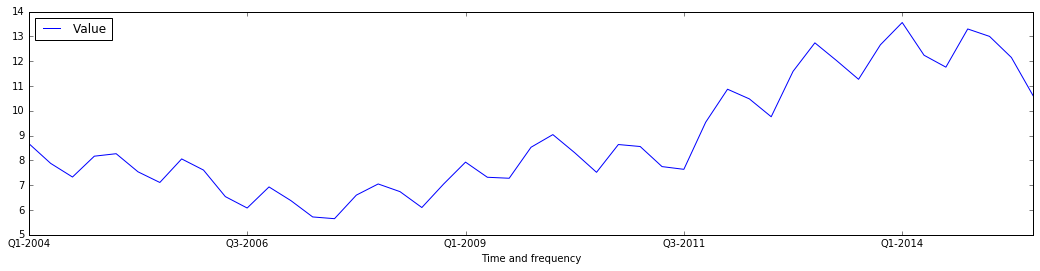

In [13]:
df.plot(x='Time and frequency',y='Value', figsize=(18,4))

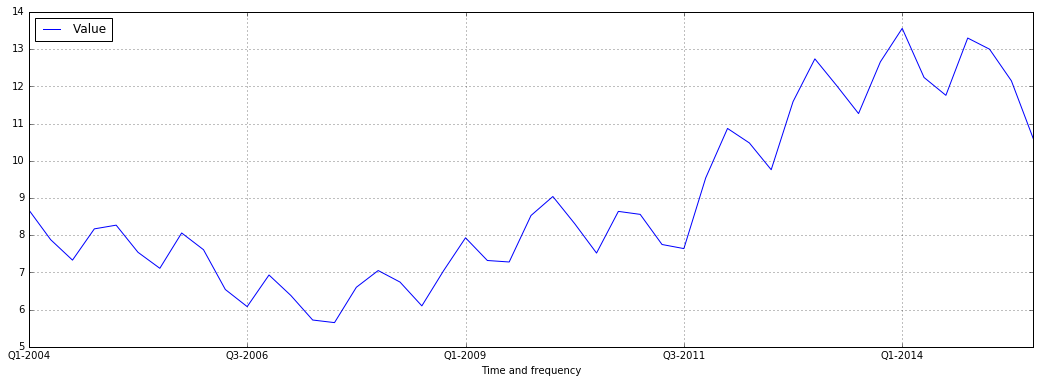

In [14]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
plt.grid(True)
df.plot(x='Time and frequency',y='Value', ax=ax, grid=True) 
# kind='barh', , alpha=a, legend=False, color=customcmap,
# edgecolor='w', xlim=(0,max(df['population'])), title=ttl)

In [15]:
# plt.figure(figsize=(7,4))
# plt.plot(df['Time and frequency'],df['Value'], lw=1.5, label='1st')
# plt.plot(y[:,1], lw=1.5, label='2st')
# plt.plot(y,'ro')
# plt.grid(True)
# plt.legend(loc=0)
# plt.axis('tight')
# plt.xlabel('index')
# plt.ylabel('value')
# plt.title('a simple plot')

In [16]:
# forza lavoro
istat_forzlv = istat.dataset('LAB', 'DCCV_FORZLV')

spec = { 
    "Territory": 'Italy',                            
    "Data type": 'number of labour force 15 years and more (thousands)',                            # 
    'Measure':   'absolute values',               
    'Gender':    'total',                               
    'Age class': '15 years and over',                            
    'Highest level of education attained': 'total', 
    'Citizenship': 'total',                         
    'Time and frequency': 0                    
}

df_forzlv = istat_forzlv.getvalues(spec).dataset(0).to_table(rtype=pd.DataFrame)
df_forzlv = df_forzlv.dropna()
df_forzlv = df_forzlv[df_forzlv['Time and frequency'].str.contains(r'^Q.*')]
df_forzlv.tail(6)

,Time and frequency,Value
187,Q2-2014,25419.15
188,Q3-2014,25373.70
189,Q4-2014,25794.44
190,Q1-2015,25460.25
191,Q2-2015,25598.29
192,Q3-2015,25321.61


In [17]:
istat_inattiv = istat.dataset('LAB', 'DCCV_INATTIV')
# HTML(istat_inattiv.info_dimensions_as_html())

In [18]:
spec = { 
    "Territory": 'Italy',                            
    "Data type": 'number of inactive persons',                           
    'Measure':   'absolute values',               
    'Gender':    'total',                               
    'Age class': '15 years and over',                            
    'Highest level of education attained': 'total', 
    'Time and frequency': 0                    
}

df_inattiv = istat_inattiv.getvalues(spec).dataset(0).to_table(rtype=pd.DataFrame)
df_inattiv = df_inattiv.dropna()
df_inattiv = df_inattiv[df_inattiv['Time and frequency'].str.contains(r'^Q.*')]
df_inattiv.tail(6)

,citizenship,Labour status,Inactivity reasons,Main status,Time and frequency,Value
24756,total,total,total,total,Q2-2014,26594.57
24757,total,total,total,total,Q3-2014,26646.90
24758,total,total,total,total,Q4-2014,26257.15
24759,total,total,total,total,Q1-2015,26608.07
24760,total,total,total,total,Q2-2015,26487.67
24761,total,total,total,total,Q3-2015,26746.26
